# Libraries Required

In [1]:
import cv2
import numpy as np

## Function to Reisize photo without changing aspect ratio

In [2]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

# Mask For Stained Tooth 

In [3]:
cap=cv2.imread("p2.jpg")
cap =  ResizeWithAspectRatio(cap, width=600)
frame=cap
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv,(7, 142, 67), (15, 255, 212))
mask = cv2.bitwise_and(frame,frame,mask=mask1)
cv2.imshow("m2", frame);
cv2.imshow("m1", mask);
cv2.waitKey(0)
cv2.destroyAllWindows()

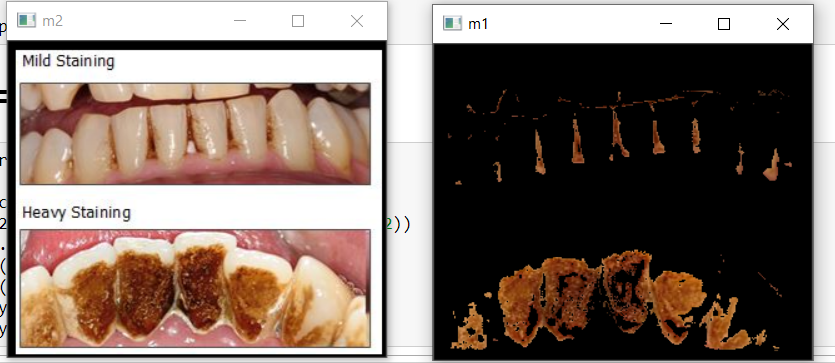

# Smoothing out the Mask

In [4]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel)
no_contour = cv2.bitwise_and(frame,frame, mask=opening)
cv2.imshow('hola1',frame)
cv2.imshow('hola1',opening)
cv2.imshow('hola',no_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()
contour,hier = cv2.findContours(opening,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contour:
    cv2.drawContours(opening,[cnt],0,255,-1)
    
cv2.imshow("m3", opening);
cv2.waitKey(0)
cv2.destroyAllWindows()

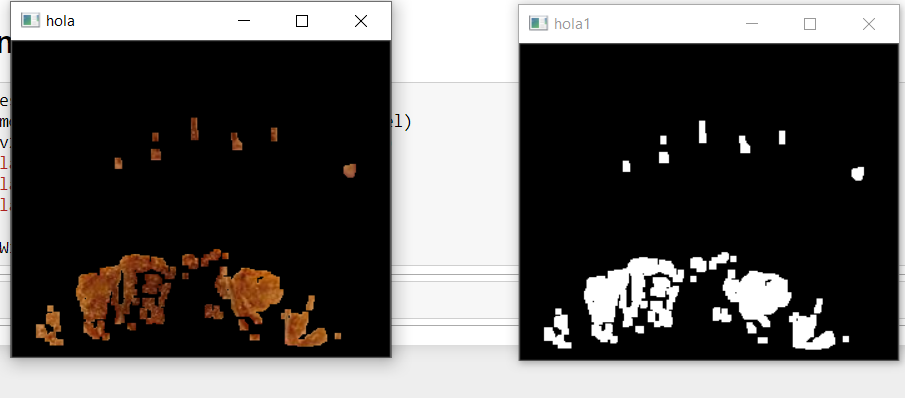

# To Calculate percentage

In [ ]:
def percentage(x,w,y,h,img):
    count=0;
    for i in range(x,x+w):
        for j in range(y,y+h):
            #print(img[i,j])
            if(img[j,i]==255 ):
                count+=1;
    #print(count)
    return (count*100)/(w*h)

# Rectangle creation over cavity via the genrated mask

In [6]:
thresh=opening
kernel = np.ones((20,20), np.uint8)
img = cv2.dilate(thresh, kernel, iterations=1)
#print(img.shape)
avg=0;
total=0;
output_img=frame.copy()
contours,x= cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    #Area of cavity
    #print( 100* count_pixel(x,w,y,h,img)/(w*h))
    # draw a white rectangle to visualize the bounding rect
    cv2.rectangle(output_img, (x, y), (x + w, y + h), 255, 1)
    avg=avg+percentage(x,w,y,h,img)
    total=total+1
    
print("Percentage: ", avg/total)
cv2.imshow('output',output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

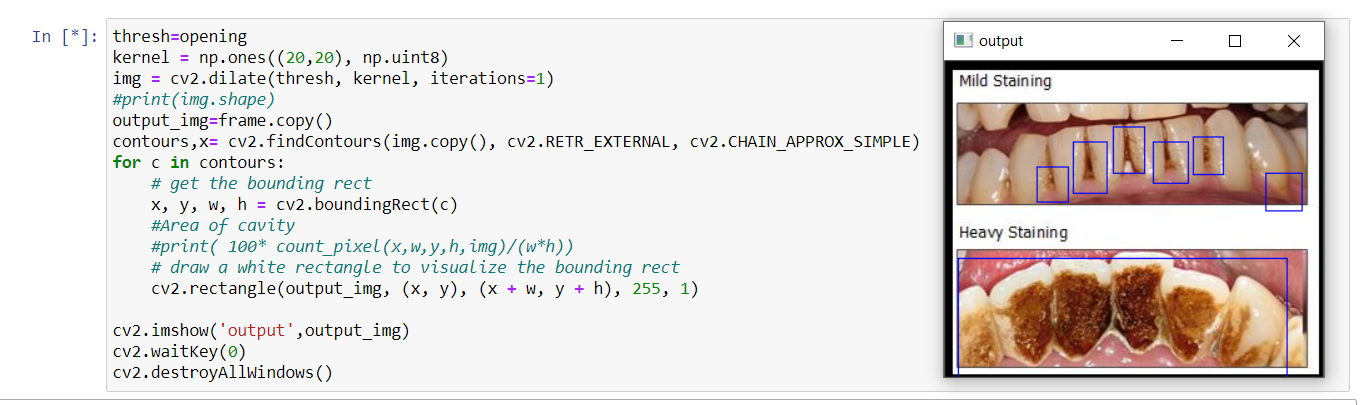